Before creating a block model from the picture below, let's walk throught the main OMF block model attributes

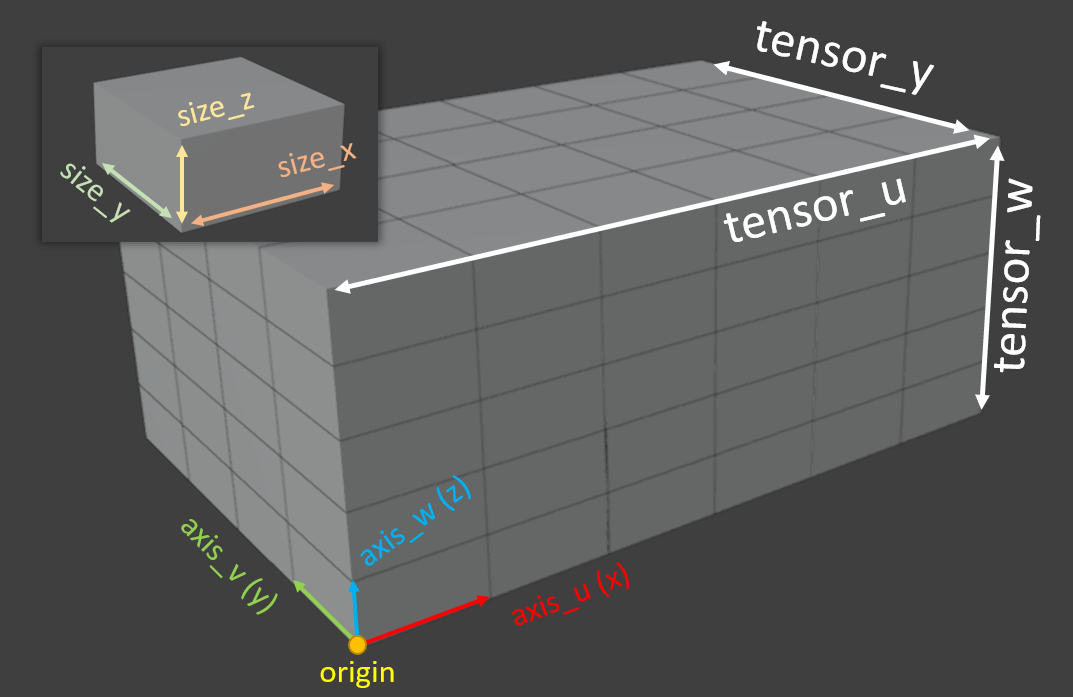

In [2]:
import numpy as np
import pandas as pd
import omf

In [3]:
bm_origin = [100000, 200000, 3000] #example

size_x = 20.0
size_y = 20.0
size_z = 10.0
num_blocks_x = 6
num_blocks_y = 4
num_blocks_z = 5

tensor_u = np.full(int(num_blocks_x), size_x, dtype=float)
tensor_v = np.full(int(num_blocks_y), size_y, dtype=float)
tensor_w = np.full(int(num_blocks_z), size_z, dtype=float)
print(f"tensor_u is an array of blocks along axis_u (x): {tensor_u}")
print(f"tensor_v is an array of blocks along axis_v (y): {tensor_v}")
print(f"tensor_w is an array of blocks along axis_w (x): {tensor_w}")

tensor_u is an array of blocks along axis_u (x): [20. 20. 20. 20. 20. 20.]
tensor_v is an array of blocks along axis_v (y): [20. 20. 20. 20.]
tensor_w is an array of blocks along axis_w (x): [10. 10. 10. 10. 10.]


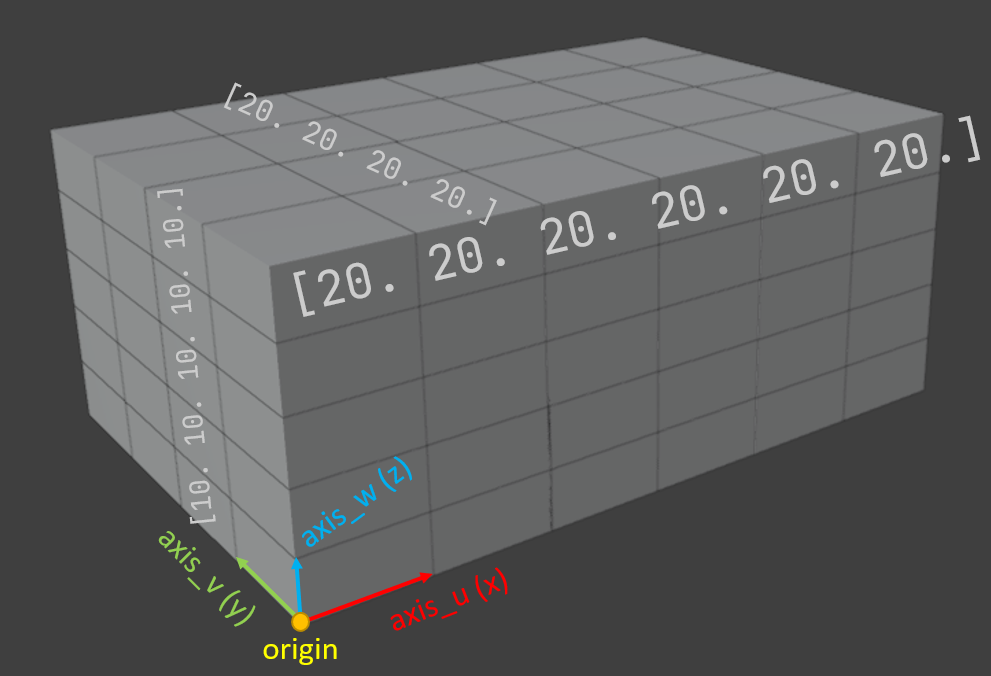

tensor_u is an array of blocks along axis_u (x): [20. 20. 20. 20. 20. 20.]

tensor_v is an array of blocks along axis_v (y): [20. 20. 20. 20.]

tensor_w is an array of blocks along axis_w (x): [10. 10. 10. 10. 10.]


Packing OMF Attributes

Attributes unlike blocks in TensorBlockModel are independent from any tensor groups and can be unique in every block. That is why every attribute is stored in a single flat array. The length of the attribute array should be equal to num_blocks_x * num_blocks_y * num_blocks_z. If the array length will be different, there will be an exeption thrown during omf file creation.

When converting model from or into OMF it is important to keep track of where along BM's 3Vector dimention system each value from attribute flat array is stored. This is where a block model indexing becomes very important.

Indexes are usually referred as i, j, k (red, blue and green on the illustration below) values and they represent a block sequence number along each axis:
(Please note that 1,1,1 is basically means first,first,first. In programming and farther below first elements are usually represented by [0,0,0])

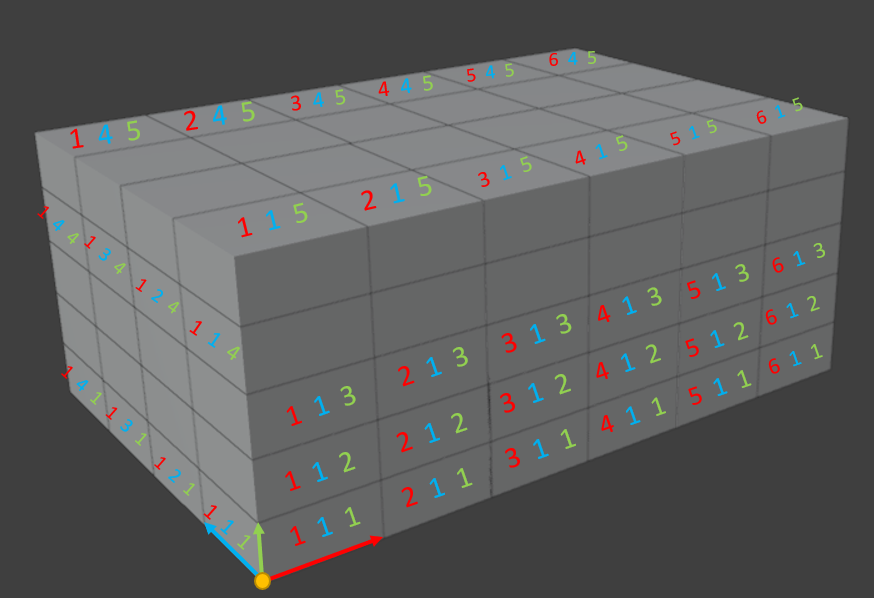

Often when block model is getting packed into .omf, 3-dimentional array (tensors) become a data structure which represents every single block. To make sure the right attribute is assigned to it's block, we have to follow an packing pattern where z-values changes first (the most rapid change), y-values next and x-values last.

Please note that we are creating an .omf block model. When we unpack it to any other format (FreeCAD's for instance) we have to follow an opposite direction. It is well described in the official omf github [page](https://github.com/denismikulich91/omf-python-fork/blob/dev/notebooks/omf_cbi.ipynb)

Here is an attribute pack graphic illustration:

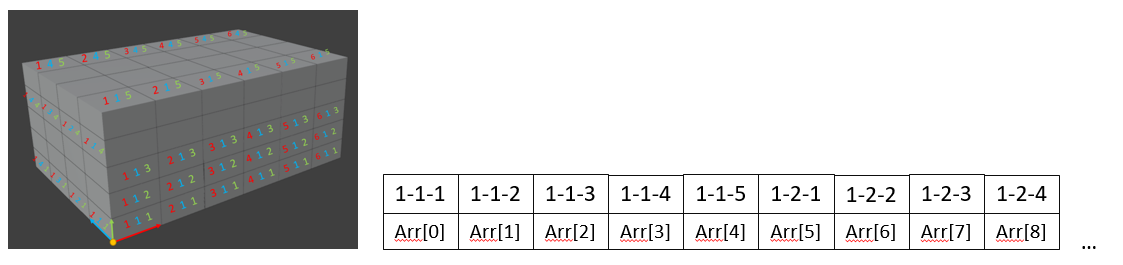


Here is an attribute pack code illustration:

In [7]:
index = 0
attribute_array = []
for i in range(len(tensor_u)):
    for j in range(len(tensor_v)):
        for k in range(len(tensor_w)):
            # Uncomment line below to see the ijk iteration
            print(f"attribute index in flat array: {index}\t ijk index: {(i, j, k)}")
            attribute_array.append(index)
            index += 1
            

attribute index in flat array: 0	 ijk index: (0, 0, 0)
attribute index in flat array: 1	 ijk index: (0, 0, 1)
attribute index in flat array: 2	 ijk index: (0, 0, 2)
attribute index in flat array: 3	 ijk index: (0, 0, 3)
attribute index in flat array: 4	 ijk index: (0, 0, 4)
attribute index in flat array: 5	 ijk index: (0, 1, 0)
attribute index in flat array: 6	 ijk index: (0, 1, 1)
attribute index in flat array: 7	 ijk index: (0, 1, 2)
attribute index in flat array: 8	 ijk index: (0, 1, 3)
attribute index in flat array: 9	 ijk index: (0, 1, 4)
attribute index in flat array: 10	 ijk index: (0, 2, 0)
attribute index in flat array: 11	 ijk index: (0, 2, 1)
attribute index in flat array: 12	 ijk index: (0, 2, 2)
attribute index in flat array: 13	 ijk index: (0, 2, 3)
attribute index in flat array: 14	 ijk index: (0, 2, 4)
attribute index in flat array: 15	 ijk index: (0, 3, 0)
attribute index in flat array: 16	 ijk index: (0, 3, 1)
attribute index in flat array: 17	 ijk index: (0, 3, 2)
at

After calculating all attributes needed to create a simple TensorBlockModel we can create a block model instance. API below using version 1.0 and TensorBlockModel was the only available block model type so simply called VolumeElement. More differences between 1.0 and 2.0 omf versions [here](https://gmggroup.org/global-mining-guidelines-group-releases-beta-open-mining-format-version-2/). 

About block model types supported in version 2.0 read [here](https://github.com/denismikulich91/omf-python-fork/blob/dev/notebooks/omf_cbi.ipynb)

In [5]:
omf_bm = omf.VolumeElement(
    name='block_model',
    geometry=omf.VolumeGridGeometry(
        tensor_u=tensor_u,
        tensor_v=tensor_v,
        tensor_w=tensor_w,
        origin=bm_origin
    ),
    data=[
      omf.ScalarData(
        location="cells",
        name="index_sequence",
        array=np.array(attribute_array)
      )
    ]
)

OMF itself is not a single file format. The huge straight of this format is that user can store the entire project including polylines, points, surfaces, BMs etc which will be well structured. So it is important to place a created BM into the projects and the create an OMF file:

In [6]:
proj = omf.Project(
    name='Test project',
    description='Creating tiny BM from scratch'
)
proj.elements = [omf_bm]
assert proj.validate()
omf.OMFWriter(proj, '../design_assets/test_bm.omf')

After importing OMF block model into FreeCAD workbench I expect to see that my attribute number follows the ijk index sequence. First line in the block model table should represent block which is first along each axis. Also origin has been applied to every block coordinate

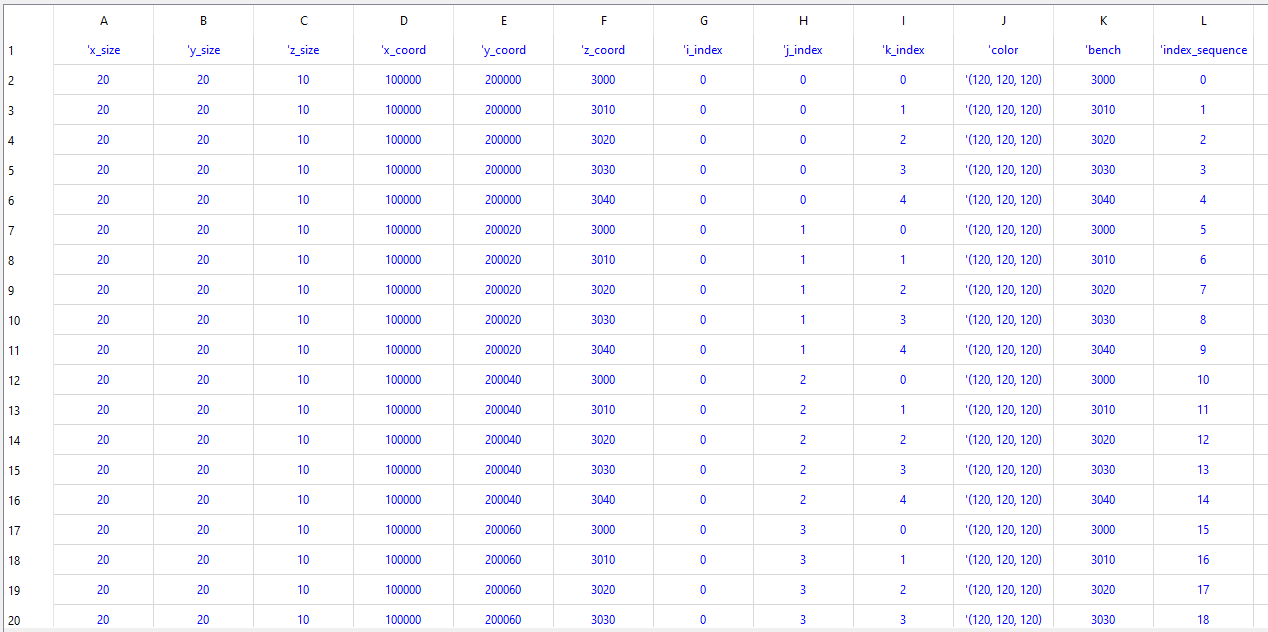

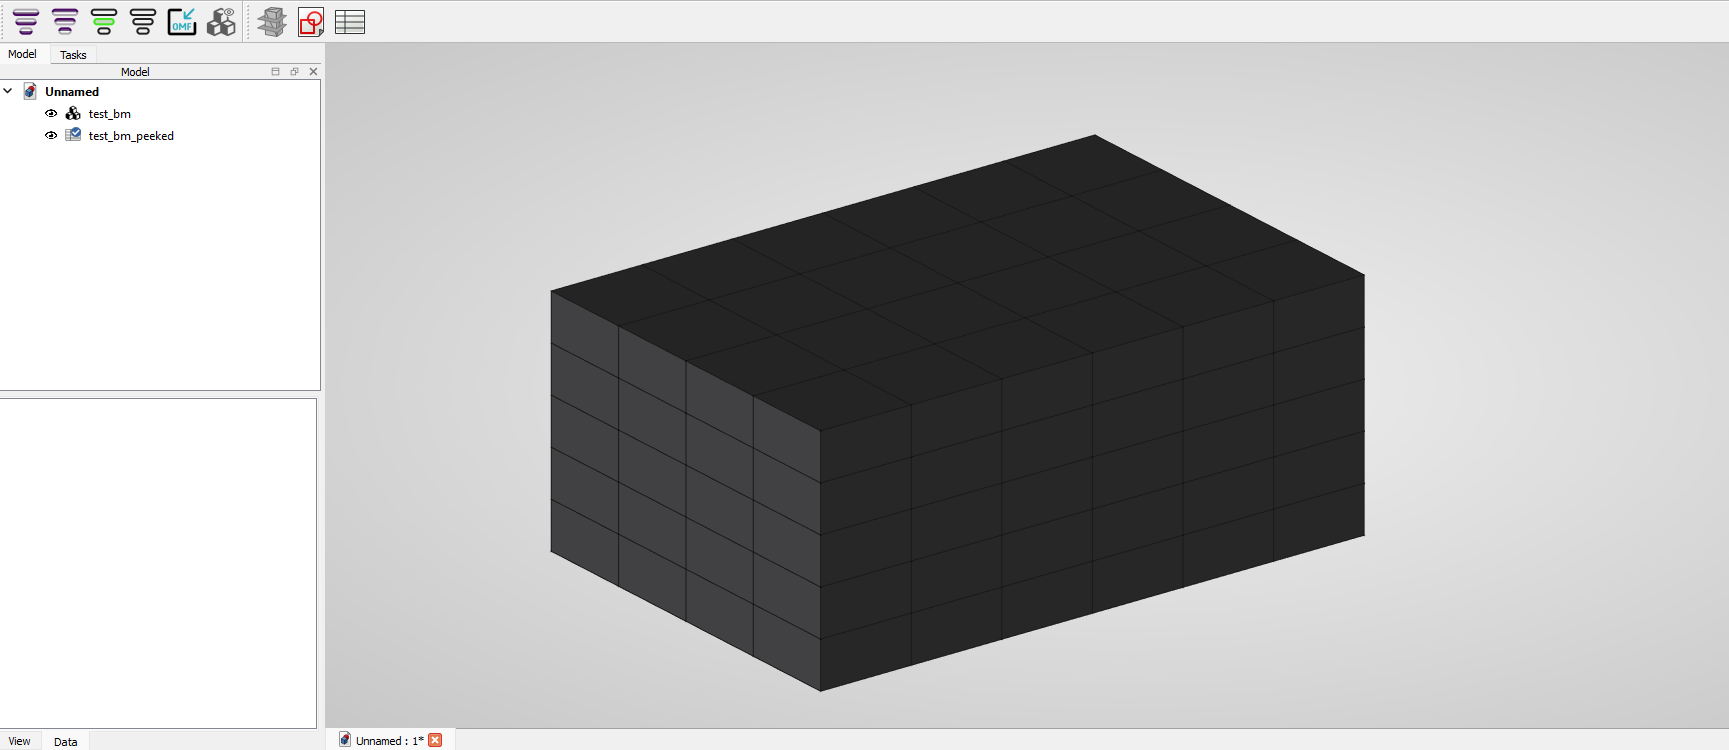